In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
df=pd.read_csv('/content/advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

## dataset overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


## Statistics Summary Interpretations

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


DATA VISUALIZATION

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


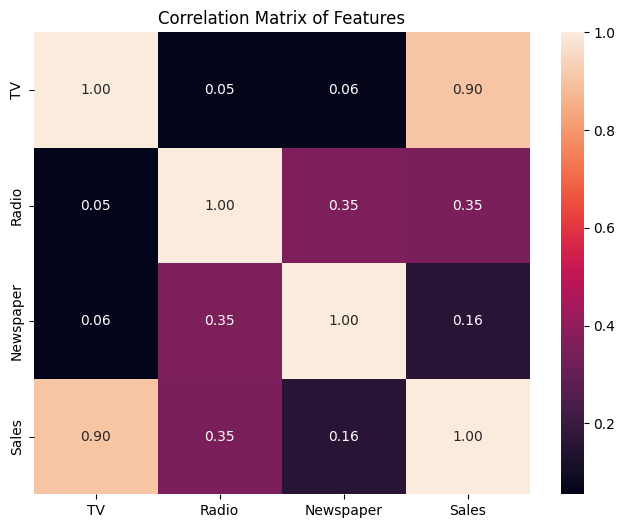

In [10]:
print(df.corr())
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

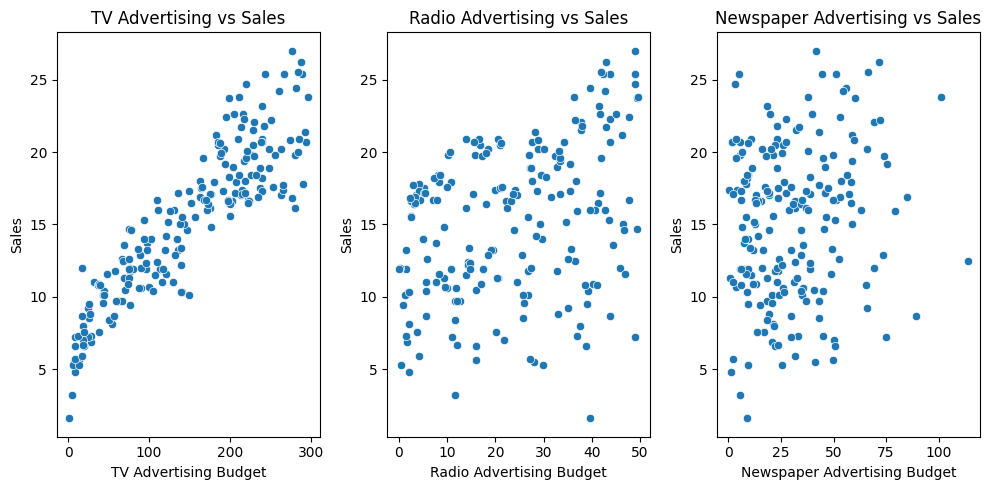

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.scatterplot(x="TV", y="Sales", data=df, ax=axes[0])
axes[0].set_title("TV Advertising vs Sales")
axes[0].set_xlabel("TV Advertising Budget")
axes[0].set_ylabel("Sales")

sns.scatterplot(x="Radio", y="Sales", data=df, ax=axes[1])
axes[1].set_title("Radio Advertising vs Sales")
axes[1].set_xlabel("Radio Advertising Budget")
axes[1].set_ylabel("Sales")

sns.scatterplot(x="Newspaper", y="Sales", data=df, ax=axes[2])
axes[2].set_title("Newspaper Advertising vs Sales")

axes[2].set_xlabel("Newspaper Advertising Budget")
axes[2].set_ylabel("Sales")

plt.tight_layout()
plt.show()

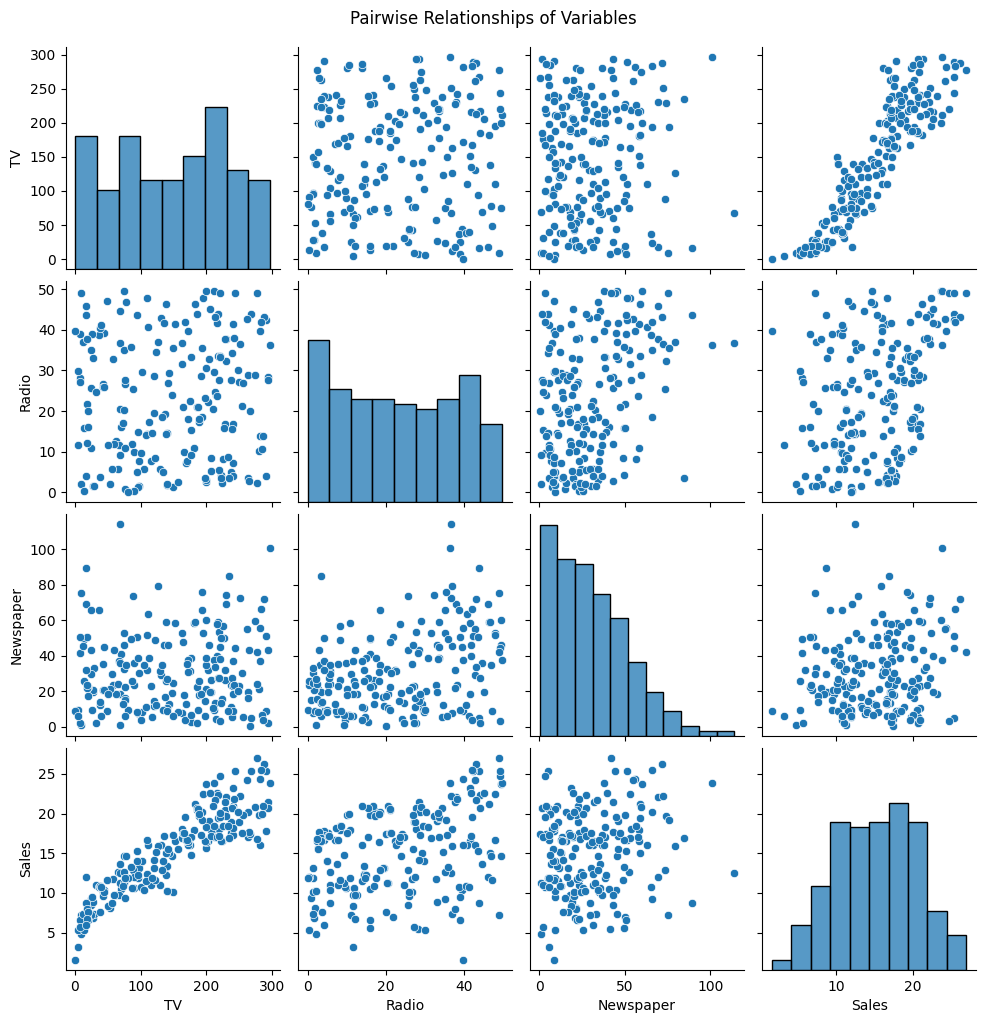

In [19]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships of Variables",y=1.02)
plt.show()


In [23]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.corr()

,TV,Radio,Newspaper
TV,1.000000,0.053872,0.019084
Radio,0.053872,1.000000,0.388074
Newspaper,0.019084,0.388074,1.000000


In [27]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

mae:  1.2748262109549346
mse:  2.9077569102710923
r2 score:  0.9059011844150826


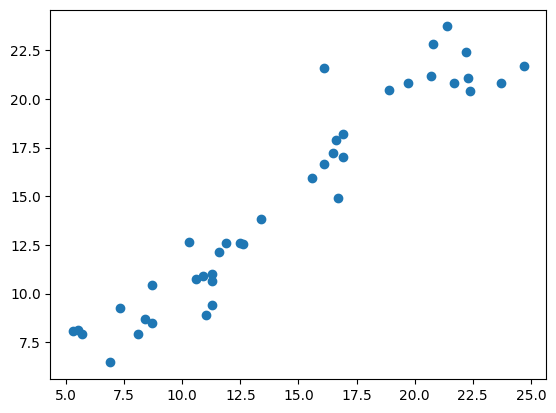

In [29]:
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mae: ',mae)
print('mse: ',mse)
print('r2 score: ',r2)

plt.scatter(y_test,y_pred)
plt.show()

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))
print()


# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))
print()


# ElasticNet Regression
elasticnet = ElasticNet(alpha=0.1)
elasticnet.fit(X_train_scaled, y_train)
y_pred_elastic = elasticnet.predict(X_test_scaled)
print("ElasticNet Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("R2:", r2_score(y_test, y_pred_elastic))

Ridge Regression:
MAE: 1.2746881366626583
MSE: 2.908428668954266
R2: 0.9058794454257529

Lasso Regression:
MAE: 1.2701391672861768
MSE: 2.930148052297701
R2: 0.905176577782095

ElasticNet Regression:
MAE: 1.2979320290735425
MSE: 3.0487854092788718
R2: 0.9013373177887236


thnk u so **much::**